### STARTUP CASESTUDY - 1

Number of Fundings

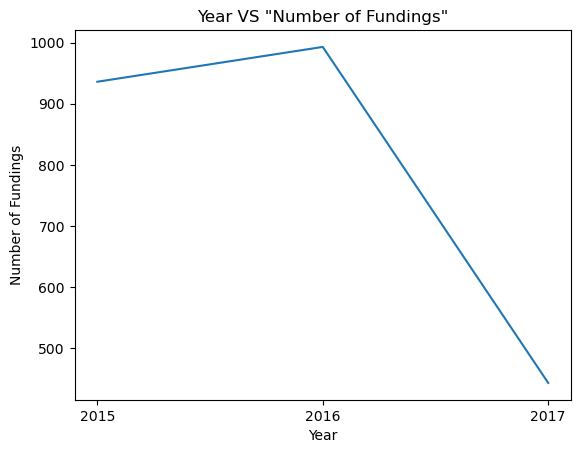

2015 936
2016 993
2017 443


In [22]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

with open("startup_funding.csv") as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    no_of_fundings = {}
    for row in file_data:
        if row["Date"] != "":
            year = row['Date'][-4:]

        if year in no_of_fundings:
            no_of_fundings[year] += 1
        else:
            no_of_fundings[year] = 1

    ordered_no_of_fundings = collections.OrderedDict(sorted(no_of_fundings.items()))                                  
    plt.plot(list(ordered_no_of_fundings.keys()),list(ordered_no_of_fundings.values()))
    plt.xlabel("Year")
    plt.ylabel("Number of Fundings")
    plt.title('Year VS "Number of Fundings"')
    plt.show()
    
    for i in ordered_no_of_fundings.keys():
        print(i, ordered_no_of_fundings[i])

Top Indian Cities

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


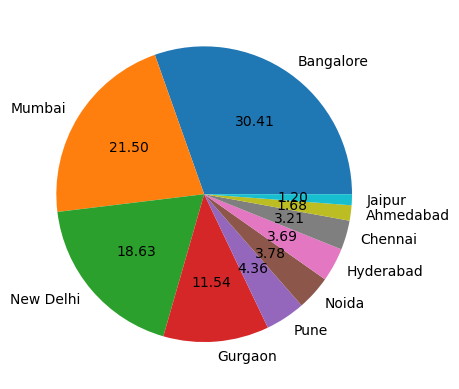

In [42]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df = df.dropna(subset=['CityLocation'])         # Removing all Null values from CityLocation Column

def separateCity(city): 
    city = city.split("/")[0].strip()           # City after removing all spaces at beginning and ending. If two cities are given seperated by "/" returning first one    
    return city

df['CityLocation']=df['CityLocation'].apply(separateCity)           # Changing the contents according to separateCity()
df[df['CityLocation']=='bangalore'] = 'Bangalore'                   # Changing 'bangalore' to ''Bangalore'
df[df['CityLocation']=='Delhi'] = 'New Delhi'                       # Changing 'Delhi' to 'New Delhi'

df = df.groupby(by='CityLocation').size()                           # Grouping cities rows and counting them
df = df.nlargest(10)                                                # Top 10 Cities in descending order
df = df.to_dict()                                                   # Converting Dataframe into dictionary

City=[]
no_of_statup=[]                         
for i , j in df.items():
    City.append(i)                                                  # Appending top 10 cities and there count into lists
    no_of_statup.append(j)
    print(i,j)

plt.pie(no_of_statup,labels=City,autopct='%.2f')                    # Creating a pie graph with city names as labels and there % share.
plt.show()

Funding Amount

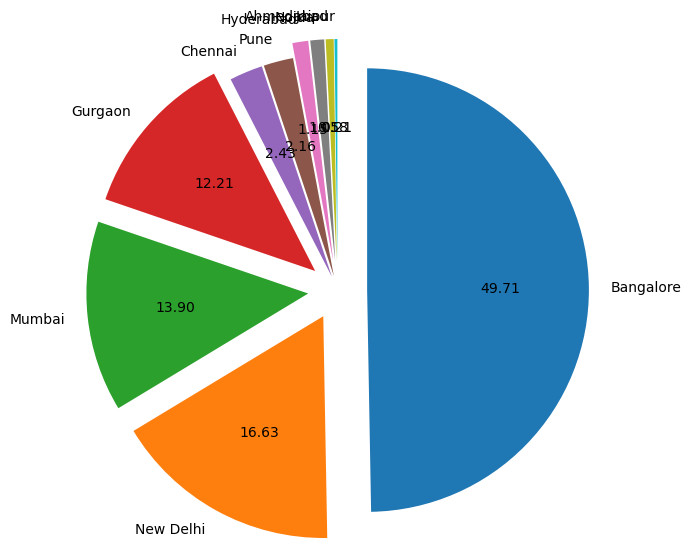

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

def separatecommas(amt):
    return float(str(amt).replace(",",""))

df['AmountInUSD'] = df['AmountInUSD'].apply(separatecommas)
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]

city = df.index
amount = df.values
explode = [0.2,0.2,0.2,0.2,0.1,0.1,0.2,0.2,0.2,0.2]

plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,startangle=90,explode =explode,radius=1.5)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))

Investment Type

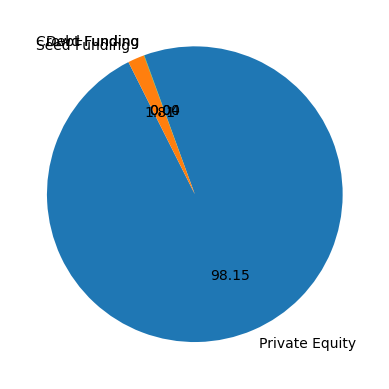

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)

def separatecommas(amt):
    return float(str(amt).replace(",",""))

df['AmountInUSD'] = df['AmountInUSD'].apply(separatecommas)

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values

plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,startangle=110)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))

Top Industries

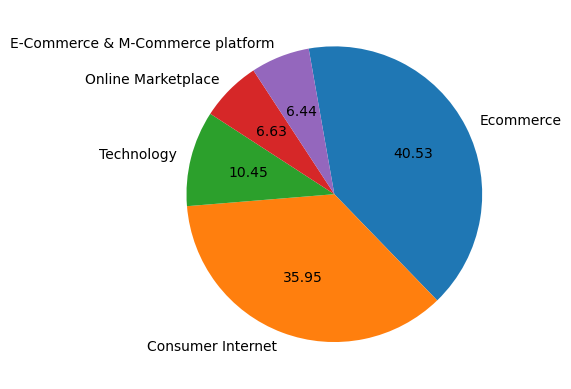

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)

def separatecommas(amt):
    return float(str(amt).replace(",",""))

df['AmountInUSD'] = df['AmountInUSD'].apply(separatecommas)
df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]

industryType = df.index
amount = df.values

plt.pie(amount,labels = industryType,autopct='%0.2f',counterclock=False,startangle=100)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industryType)):
    print(industryType[i],format(percent[i],'0.2f'))

Top StartUps

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

def separatecommas(amt):
    return float(str(amt).replace(",",""))

df['AmountInUSD'] = df['AmountInUSD'].apply(separatecommas)
df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
startup = df.index
for i in range(5):
    print(startup[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


Fundings Rounds

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)\

totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values
for i in range(5):
    print(startupname[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


Top Investors

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['InvestorsName'].dropna(inplace = True)

def createDict(array):
    dictionary = {}
    for i in array:
        if ',' not in i:
            if i in dictionary:
                dictionary[i] = dictionary.get(i)+1
                
            else:
                dictionary[i] = 1
        else:
            string = i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()] = dictionary.get(j.strip()) +1
                else:
                    dictionary[j.strip()] = 1
    return dictionary

dictionary = createDict(df['InvestorsName'])
dataf = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
dataf = dataf.sort_values(by = [0], ascending = False)
print(dataf.index[0],dataf.values[0][0])

TypeError: argument of type 'float' is not iterable

In [22]:
import pandas as pd
import numpy as np
import collections

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.InvestorsName.fillna("",inplace = True)
investors = df.InvestorsName

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1
for i in dct:
    print(i, dct[i])
    
dct_keys = sorted(dct,key=dct.get,reverse=True)
print(dct_keys[0],dct[dct_keys[0]])

Kae Capital 22
Triton Investment Advisors 1
Kashyap Deorah 3
Anand Sankeshwar 2
Deepak Jain 1
Sadashiva NT 1
Arjun Mehta 1
Satish Kaul 1
Anindya Ghose 1
Kunal Shah 17
LetsVenture 17
Anupam Mittal 18
Hetal Sonpal 1
Narottam Thudi 1
Shireesh Palle 1
Reliance Corporate Advisory Services Ltd 1
Infuse Ventures 8
JLL 2
Asset Management (Asia) Ltd 1
Digital Garage Inc 1
Kalaari Capital 44
Nexus India Capital Advisors 1
International Finance Corporation 2
Rocketship 2
Accel Partners 53
Jungle Ventures 13
Shailesh Rao 1
Venture Highway 3
BCCL 1
Blume Ventures 39
Contrarian Capital India Partners 1
Emergent Ventures India 1
Pallav Nadhani 4
Ashish Gupta 6
Sharad Sharma 4
Sirion Labs 1
India Quotient 21
Shunwei Capital 3
Sreeram Iyer 1
Suvo Sarkar 1
Anita Gupta 1
Likemind Ventures 1
Mitsui & Co. 2
Dunamis Ventures Pte Ltd 1
Venture Catalysts 7
Sourav Ganguly 1
Ankit Aditya 1
Moksh Sports Ventures 1
Fireside Ventures 5
Apurva Salarpuria 1
Sidharth Pansari 2
Sprout Capital 1
SBI-FMO Fund 1
Bessemer

### STARTUP CASESTUDY - 2

Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


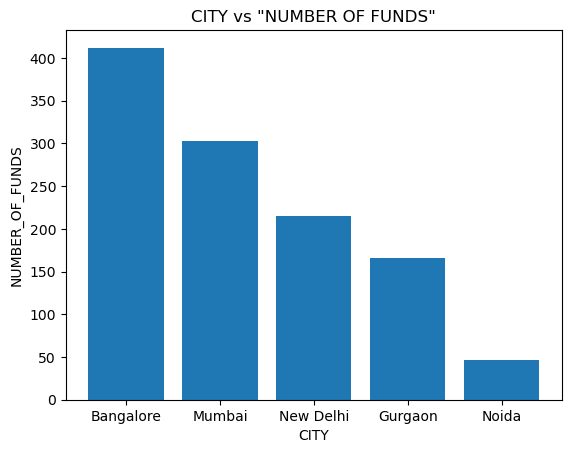

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].count()
df = df.sort_values(ascending = False)
df=df[(df.index=='Bangalore') | (df.index=='Mumbai') | (df.index=='New Delhi') | (df.index=='Gurgaon') | (df.index=='Noida')]
city = df.index
totalfunds = df.values

for i in range(len(city)):
    print(city[i],totalfunds[i])

plt.bar(city ,totalfunds)
plt.ylabel('NUMBER_OF_FUNDS')
plt.xlabel('CITY')
plt.title('CITY vs "NUMBER OF FUNDS"')
plt.show()